<a href="https://colab.research.google.com/github/IrynaBarnych/AI18/blob/lab/module5/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BE%D0%BC%D0%BF%D1%8E%D1%82%D0%B5%D1%80%D0%BD%D0%B8%D0%B9_%D0%B7%D1%96%D1%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Завдання 1

Зробіть сегментацію для наступного зображення https://github.com/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/images/cat.jpg

* завантежте модель `deeplabv3_resnet50` та відповідні ваги `DeepLabV3_ResNet50_Weights` [документація](https://pytorch.org/vision/stable/models/generated/torchvision.models.segmentation.deeplabv3_resnet50.html#deeplabv3-resnet50)
* застосуйте `transforms.Resize` до зображення
* застосуйте `transforms` з ваг до зображення
* змініть розмірність зображення на потрібну
* отримайте результат моделі
* застосуйте `draw_segmentation_masks`

In [9]:
import torch
from torchvision.io.image import read_image
from torchvision.models.segmentation import deeplabv3_resnet50, DeepLabV3_ResNet50_Weights
from torchvision import transforms

# Завантажуємо зображення
img = read_image("/content/cat.jpg")

# Змінюємо розмір
img = transforms.Resize((520, 520))(img)

# Завантажуємо натреновану модель
weights = DeepLabV3_ResNet50_Weights.DEFAULT
model = deeplabv3_resnet50(weights=weights)
model.eval()

# Завантажуємо препроцесор для моделі(без зміни розмірів)
preprocess = weights.transforms(resize_size=None)

# Обробляєио забраження та змінюємо розмірність до [1, 3, width, height]
batch = preprocess(img)
batch = batch.unsqueeze(0)

# Робимо прогноз
with torch.no_grad():
  prediction = model(batch)["out"]

masks = prediction.argmax(dim=1)
mask = masks[0]

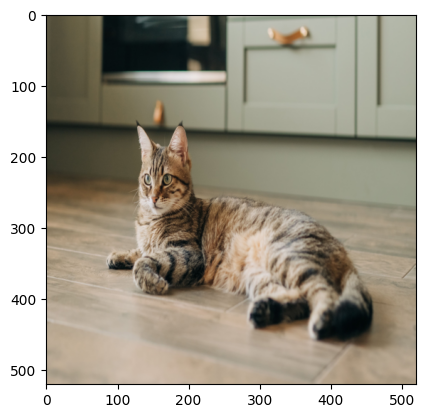

In [10]:
import matplotlib.pyplot as plt

# Візуалізація
plt.imshow(img.permute(1, 2, 0))

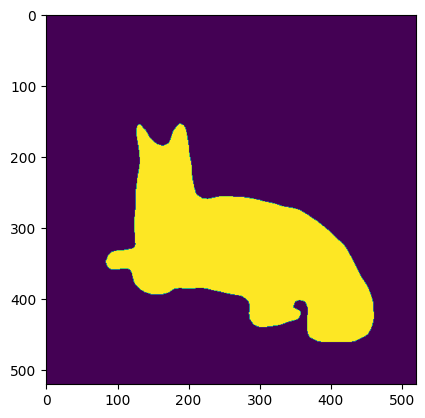

In [11]:
plt.imshow(mask)

In [12]:
mask.unique()

tensor([0, 8])

In [13]:
# Індекси класів
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
class_to_idx

{'__background__': 0,
 'aeroplane': 1,
 'bicycle': 2,
 'bird': 3,
 'boat': 4,
 'bottle': 5,
 'bus': 6,
 'car': 7,
 'cat': 8,
 'chair': 9,
 'cow': 10,
 'diningtable': 11,
 'dog': 12,
 'horse': 13,
 'motorbike': 14,
 'person': 15,
 'pottedplant': 16,
 'sheep': 17,
 'sofa': 18,
 'train': 19,
 'tvmonitor': 20}

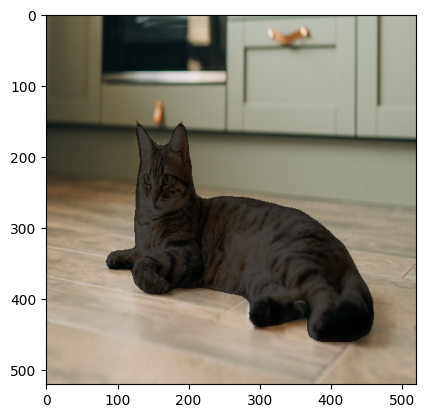

In [15]:
from torchvision.utils import draw_segmentation_masks

cat_mask = mask == class_to_idx['cat']

masked_img = draw_segmentation_masks(img, cat_mask, alpha=0.7)

plt.imshow(masked_img.permute(1, 2, 0))

In [16]:
img.shape

torch.Size([3, 520, 520])

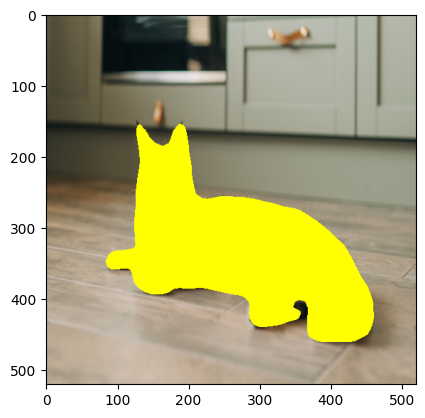

In [17]:
masked_img = img.clone() # копіювання
masked_img = masked_img.to(int) # зміна типу даних на int

yellow_pixel = torch.tensor([255, 255, 0])
masked_img[:, cat_mask] = yellow_pixel.view(-1, 1)

plt.imshow(masked_img.permute(1, 2, 0))

In [18]:
!pip install -q ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.8/750.8 kB 9.0 MB/s eta 0:00:00


In [20]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # pretrained YOLOv8n model

# Run batched inference on a list of images
results = model.predict(source='/content/cat.jpg',
                        conf = 0.2,
                        iou=0.7)

result = results[0]


image 1/1 /content/cat.jpg: 448x640 1 cat, 298.9ms
Speed: 5.6ms preprocess, 298.9ms inference, 4.8ms postprocess per image at shape (1, 3, 448, 640)


In [23]:
result.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [26]:
img_with_detection = result.plot(filename='result.png',
                                 save=True)

In [25]:
type(img_with_detection)

numpy.ndarray

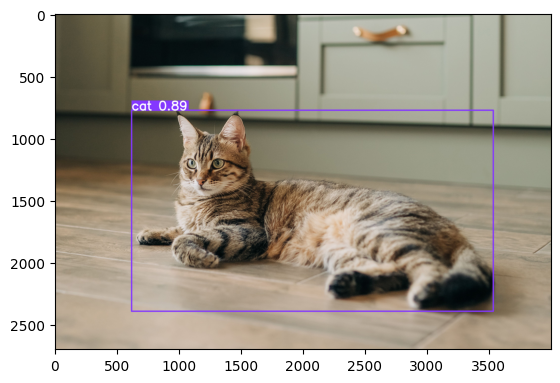

In [27]:
plt.imshow(img_with_detection[:, :, ::-1])

# Завдання 2

Проведіть виявлення об'єктів на даному зображенні https://www.thespruce.com/thmb/o_zAsNy0xWNWeq9xfWwAo6fhueo=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/SPR-luxury-kitchens-5211364-hero-688d716970544978bc12abdf17ce6f83.jpg

* Підберіть різні параметри `conf` та `iou` щоб подивитись на результат роботи моделі
* За допомогою параметра `classes` визначіть на зображенні лише:
  1. стільці
  2. бокали для вина
  3. рослини та вази

In [118]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8n.pt')  # pretrained YOLOv8n model

# Run batched inference on a list of images
results = model.predict(source='/content/kitchen.jpg',
                        conf = 0.2,
                        iou=0.6,
                        classes=[56, 40, 58, 75])

result = results[0]


image 1/1 /content/kitchen.jpg: 448x640 2 wine glasss, 4 chairs, 3 potted plants, 3 vases, 236.5ms
Speed: 4.4ms preprocess, 236.5ms inference, 1.8ms postprocess per image at shape (1, 3, 448, 640)


In [119]:
result.names

{0: 'person',
 1: 'bicycle',
 2: 'car',
 3: 'motorcycle',
 4: 'airplane',
 5: 'bus',
 6: 'train',
 7: 'truck',
 8: 'boat',
 9: 'traffic light',
 10: 'fire hydrant',
 11: 'stop sign',
 12: 'parking meter',
 13: 'bench',
 14: 'bird',
 15: 'cat',
 16: 'dog',
 17: 'horse',
 18: 'sheep',
 19: 'cow',
 20: 'elephant',
 21: 'bear',
 22: 'zebra',
 23: 'giraffe',
 24: 'backpack',
 25: 'umbrella',
 26: 'handbag',
 27: 'tie',
 28: 'suitcase',
 29: 'frisbee',
 30: 'skis',
 31: 'snowboard',
 32: 'sports ball',
 33: 'kite',
 34: 'baseball bat',
 35: 'baseball glove',
 36: 'skateboard',
 37: 'surfboard',
 38: 'tennis racket',
 39: 'bottle',
 40: 'wine glass',
 41: 'cup',
 42: 'fork',
 43: 'knife',
 44: 'spoon',
 45: 'bowl',
 46: 'banana',
 47: 'apple',
 48: 'sandwich',
 49: 'orange',
 50: 'broccoli',
 51: 'carrot',
 52: 'hot dog',
 53: 'pizza',
 54: 'donut',
 55: 'cake',
 56: 'chair',
 57: 'couch',
 58: 'potted plant',
 59: 'bed',
 60: 'dining table',
 61: 'toilet',
 62: 'tv',
 63: 'laptop',
 64: 'mou

In [131]:
img_with_detection = result.plot(filename='result_kitchen.png',
                                 save=True)

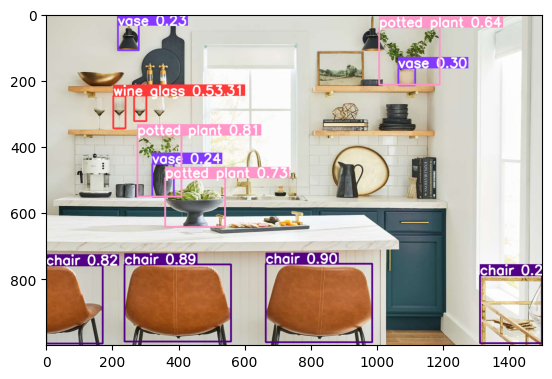

In [134]:
plt.imshow(img_with_detection[:, :, ::-1])